In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Load in the data set



df = pd.read_csv("final.xlsx - dataset.csv")
df.head()
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.corr()
df[["pct_sold_below_list","date","mean_days_pending", "sales_count_nowcast","zhvi","invt_for_sale","median_list_price","median_sale_price"]].groupby("date").describe().round(4)


## Summary statistics for diff groupings 
df = pd.read_csv("final.xlsx - dataset.csv")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y.%m.%d')

# Extract the year and create a new column
df['year'] = df['date'].dt.year
df['state'] = df['region_name'].str[-2:]
year_description = df[["pct_sold_below_list","year","mean_days_pending", "sales_count_nowcast","zhvi","invt_for_sale","median_list_price","median_sale_price"]].groupby("year").describe().round(4)
state_description = df[["pct_sold_below_list","state","mean_days_pending", "sales_count_nowcast","zhvi","invt_for_sale","median_list_price","median_sale_price"]].groupby("state").describe().round(4)
year_description_df = pd.DataFrame(year_description)
state_description_df = pd.DataFrame(state_description)

year_description_df.to_csv("year_description.csv")
state_description_df.to_csv("state_description.csv")



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleanedZillowData.csv")
df.drop(['region_name', 'region_type', 'state_name', 'state', 'date', 'median_sale_price', 'median_list_price', 'sales_count_nowcast'], axis=1, inplace=True)
df.corr()


,Unnamed: 0,region_id,size_rank,price_cut_perc_median,price_cut_perc_mean,mean_days_upto_close,pct_sold_below_list,pct_sold_above_list,median_sale_to_list_ratio,mean_days_pending,new_pending_count,new_listings_count,invt_for_sale,zori_calc,zhvi,year,est_num_sold_below_list
Unnamed: 0,1.0000,0.0054,-0.0014,0.4174,0.4143,-0.0584,-0.5176,0.4791,0.4099,-0.5213,0.0633,-0.0372,-0.1464,0.3437,0.2400,0.9785,-0.1931
region_id,0.0054,1.0000,-0.0331,0.0001,0.0021,-0.0350,0.0503,-0.0189,-0.0470,0.0388,0.1190,0.0632,0.0543,0.2716,0.2768,0.0000,0.0687
size_rank,-0.0014,-0.0331,1.0000,0.0430,0.0625,0.0240,0.0040,-0.0241,-0.0132,0.0330,-0.7136,-0.6931,-0.5957,-0.3281,-0.2301,0.0000,-0.6242
price_cut_perc_median,0.4174,0.0001,0.0430,1.0000,0.9872,0.3812,-0.4282,0.5444,0.4491,-0.3147,-0.0470,-0.0715,-0.1107,0.1092,0.0573,0.4070,-0.1854
price_cut_perc_mean,0.4143,0.0021,0.0625,0.9872,1.0000,0.3695,-0.4034,0.5132,0.4156,-0.2936,-0.0743,-0.1038,-0.1348,0.0698,0.0164,0.4127,-0.2067
mean_days_upto_close,-0.0584,-0.0350,0.0240,0.3812,0.3695,1.0000,0.0592,0.0239,-0.0281,0.0669,0.0553,0.0998,0.1567,-0.0898,-0.2848,-0.0569,0.1642
pct_sold_below_list,-0.5176,0.0503,0.0040,-0.4282,-0.4034,0.0592,1.0000,-0.9542,-0.8633,0.8392,-0.0560,0.0386,0.2576,-0.2028,-0.2809,-0.4841,0.3069
pct_sold_above_list,0.4791,-0.0189,-0.0241,0.5444,0.5132,0.0239,-0.9542,1.0000,0.8784,-0.7858,0.0699,-0.0130,-0.2121,0.2766,0.3385,0.4503,-0.2709
median_sale_to_list_ratio,0.4099,-0.0470,-0.0132,0.4491,0.4156,-0.0281,-0.8633,0.8784,1.0000,-0.6935,0.0332,-0.0342,-0.2152,0.2005,0.2968,0.3851,-0.2695
mean_days_pending,-0.5213,0.0388,0.0330,-0.3147,-0.2936,0.0669,0.8392,-0.7858,-0.6935,1.0000,-0.0815,0.0431,0.2766,-0.1695,-0.2226,-0.4776,0.2644


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleanedZillowData.csv")
df['seattle'] = df['region_name'].apply(lambda x: 1 if x == 'Seattle, WA' else 0)
df['sanFran'] = df['region_name'].apply(lambda x: 1 if x == 'San Francisco, CA' else 0)
df.head()
df.to_csv('cleanedZillowData_SeattleDummy.csv')



In [17]:
df_test = df[(df['seattle'] == 1) | (df['sanFran'] == 1)]
test_description = df_test[["pct_sold_below_list","state","mean_days_pending", "sales_count_nowcast","zhvi","invt_for_sale","median_list_price","median_sale_price"]].groupby("state").describe().round(4)
test_description.to_csv("test_description.csv")

In [4]:
df = pd.read_csv("final.xlsx - dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['state'] = df['region_name'].str[-2:]
filtered_df = df[df['state'] != 'SA']
stateDict = {}
i = 0
for state in filtered_df['state'].unique():
    stateDict[state] = i
    i +=1
filtered_df['state'] = filtered_df['state'].map(stateDict)
filtered_df = filtered_df[filtered_df['state'] > 0]
filtered_df.head()

filtered_df['est_num_sold_below_list'] = filtered_df['pct_sold_below_list'] * filtered_df['sales_count_nowcast']

filtered_df.to_csv("cleanedZillowData.csv")

In [ ]:
def csv_to_ampersand_delimited(input_csv_path, output_file_path):
    # Read the CSV file
    df = pd.read_csv(input_csv_path)

    # Export the dataframe to a new file with "&" as the delimiter
    df.to_csv(output_file_path, sep='&' , index=False)

# Example usage of the function
input_csv_path = '/path/to/your/input.csv'  # Replace with the actual path of your CSV file
output_file_path = '/path/to/your/output.amp'  # Replace with the desired output file path

# Convert the CSV to an "&" delimited file
csv_to_ampersand_delimited("year_description.csv", "year_latex.txt")

csv_to_ampersand_delimited("state_description.csv", "state_latex.txt")

In [ ]:

df[["pct_sold_below_list","mean_days_pending", "sales_count_nowcast","zhvi","invt_for_sale","median_list_price","median_sale_price"]].corr()

#### Outlier Data


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
columns = ["pct_sold_below_list", "mean_days_pending", "sales_count_nowcast", "zhvi", "invt_for_sale", "median_list_price", "median_sale_price"]
outliers_dict = {}

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    outliers = df[column][outlier_condition]
    if not outliers.empty:
        outliers_dict[column] = outliers.index.tolist()

# If you want to print the results
for key, value in outliers_dict.items():
    print(f"Column: {key}, Outlier Indices: {value}")

# If you want to store both indices and values
outliers_info = {}
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    outliers = df[column][outlier_condition]
    if not outliers.empty:
        outliers_info[column] = [(index, value) for index, value in outliers.items()]

# To print the indices and values of outliers
for key, values in outliers_info.items():
    print(f"Column: {key}, Outlier Details: {values}")


In [ ]:
from collections import Counter

# Assuming outliers_dict is your dictionary containing outlier indices for each dimension
# For example: outliers_dict = {'dim1': [1, 2, 3], 'dim2': [2, 3, 4], ...}

# Flatten the list of all outlier indices
all_outlier_indices = [index for indices in outliers_dict.values() for index in indices]

# Count occurrences of each index
index_counts = Counter(all_outlier_indices)

# Initialize a dictionary to hold the count of indices appearing in n dimensions
outliers_in_n_dimensions = {n: 0 for n in range(1, 7)}

# Count how many indices appear in n dimensions
for count in index_counts.values():
    if count in outliers_in_n_dimensions:
        outliers_in_n_dimensions[count] += 1

# Print the final tabulations
for dimensions, count in outliers_in_n_dimensions.items():
    print(f"Number of {dimensions}-dimensional outliers: {count}")


In [ ]:
# Assuming outliers_dict is your dictionary containing outlier indices for each dimension
# For example: outliers_dict = {'dim1': [1, 2, 3], 'dim2': [2, 3, 4], ...}

# Initialize a dictionary to hold the count of outliers for each dimension
outliers_count_per_dimension = {}

# Count the number of outliers in each dimension
for dimension, outliers in outliers_dict.items():
    outliers_count_per_dimension[dimension] = len(outliers)

# If you want to print the results
for dimension, count in outliers_count_per_dimension.items():
    print(f"{dimension}: {count} outliers")


In [ ]:
columns = ["pct_sold_below_list", "mean_days_pending", "sales_count_nowcast", "zhvi", "invt_for_sale", "median_list_price", "median_sale_price"]
outliers_dict = {}

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)
    outliers_in_column = df[column][outlier_condition]
    if not outliers_in_column.empty:
        outliers_dict[column] = outliers_in_column

for key, value in outliers_dict.items():
    print(key, value)

In [ ]:
plt.scatter(df["mean_days_pending"], df["pct_sold_below_list"])
plt.xlabel("Number of days on the market")
plt.ylabel("Percentage of homes sold below list price")
plt.title("Number of days on the market vs Percentage of homes sold below list price")
plt.show()



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
df["date"] = pd.to_datetime(df["date"], format='%Y.%m.%d')

# Convert 'date' to a numerical form (number of days)
start_date = df["date"].min()
df["date_num"] = (df["date"] - start_date).dt.days

x_values = df["mean_days_pending"]
y_values = df["date_num"]
# Replace 'z_values' with the third column you want to plot
z_values = df["pct_sold_below_list"]  # Replace 'your_third_column' with the actual column name

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_values, y_values, z_values)

ax.set_xlabel('Mean Days Pending')
ax.set_ylabel('Date (days since start)')
ax.set_zlabel('Percent of homes sold below list price')  # Replace with your actual label

plt.show()

In [ ]:
aggregated_data = df.groupby('region_name').agg({'pct_sold_below_list': 'mean'}) # or other relevant aggregation
aggregated_data.reset_index(inplace=True)

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7,20))

#Plot the boxplot with the aggregated DataFrame
sns.boxplot(
    data=df, x="pct_sold_below_list", y="region_name"
)

# Add in points to show each observation
# Assuming 'method' is a categorical variable and you want to show all data points with stripplot
# sns.stripplot(
#     data=df, x="pct_sold_below_list", y="region_name", size=4, color=".3", jitter=True
# )

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

#plt.show()




In [ ]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7,20))

# Plot the boxplot with the aggregated DataFrame
sns.boxplot(
    data=df, x="median_list_price", y="region_name"
)

# Add in points to show each observation
# Assuming 'method' is a categorical variable and you want to show all data points with stripplot
# sns.stripplot(
#     data=df, x="median_list_price", y="region_name", size=4, color=".3", jitter=True
# )

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

#plt.show()


In [ ]:
## Merging data
sunny = pd.read_csv("sunny_days.xlsx - Data.csv")
sunny['date'] = pd.to_datetime(sunny['date'])
sunny['year'] = sunny['date'].dt.year
sunny['month'] = sunny['date'].dt.month
sunnyDays = sunny.groupby(['year','month', 'msa_title']).agg({'sunny_hours':'mean'})
sunnyDays.reset_index(inplace=True)
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
sunnyDays.rename(columns = {'msa_title':'region_name'}, inplace = True)
merged = pd.merge(df, sunnyDays, on=['year','month', 'region_name'], how='inner')
merged.head()

merged.to_csv("mergedZillowData.csv")

In [ ]:
def format_data_to_states(input_data, states):
    # Split the input data by lines and then by spaces
    data_rows = input_data.strip().split('\n')
    data = [row.split() for row in data_rows]

    # Zip the states with the data
    formatted_data = [
        '{} & {} & {} & {} & {} & {} & {} & {} & {}'.format(state, *row) + ' \\\\'
        for state, row in zip(states, data)
    ]

    # Join all the formatted lines into a single string
    return '\n'.join(formatted_data)

# Example usage:
input_data = """57.0	250433.9123	15443.6825	216238.0	246633.0	249600.0	258300.0	276333.0
57.0	209576.8596	18049.4557	184967.0	195467.0	205833.0	216667.0	243500.0
114.0	350250.9825	71059.9604	249800.0	286314.25	340216.5	373641.75	510000.0
570.0	662809.786	286362.023	249967.0	403900.25	634333.5	865916.5	1439333.0
171.0	468324.1111	76666.9668	330000.0	422508.0	458182.0	499000.0	646300.0
171.0	395247.6023	163478.0667	249133.0	269900.0	291600.0	609158.0	682983.0
57.0	464334.6667	35746.508	404633.0	440450.0	457967.0	476300.0	543298.0
452.0	324557.7987	81142.7873	94998.0	274125.25	301405.5	373141.25	549000.0
57.0	325235.0351	34001.6863	277966.0	296667.0	313333.0	349933.0	391933.0
57.0	668775.6491	61855.3479	592667.0	623333.0	649667.0	684917.0	791667.0
57.0	257409.4035	14809.8849	223267.0	251667.0	258267.0	263862.0	297000.0
57.0	435136.8246	85163.2703	324393.0	354639.0	424064.0	511630.0	572333.0
57.0	301531.0	11097.9966	280000.0	295633.0	301300.0	308833.0	324967.0
57.0	240944.7895	19698.5526	210950.0	224667.0	237633.0	249600.0	281600.0
57.0	189851.8772	14656.6904	162367.0	180000.0	186567.0	201667.0	219967.0
57.0	238757.7544	11183.3688	219283.0	230633.0	235773.0	249300.0	259000.0
114.0	264233.8596	25486.797	230180.0	244127.75	259263.5	275000.0	319000.0
171.0	410175.0117	146229.1705	237600.0	290433.5	344633.0	535483.5	749450.0
57.0	311344.8596	17315.2298	278100.0	298933.0	310641.0	321667.0	349933.0
114.0	240875.2018	31236.0932	189900.0	218166.5	239933.0	251474.75	325200.0
57.0	327362.5439	16309.1358	299963.0	316600.0	325800.0	331267.0	363817.0
114.0	240189.5526	30082.916	183450.0	213808.0	237466.5	268333.0	291325.0
285.0	306298.5193	62997.9138	205342.0	240696.0	318267.0	350150.0	444667.0
57.0	245118.7018	18620.4512	212333.0	231899.0	244633.0	257967.0	289500.0
57.0	292785.4211	41309.2241	240133.0	254900.0	281600.0	324667.0	373000.0
57.0	366224.7018	61883.697	300000.0	311313.0	329997.0	433333.0	477998.0
285.0	276271.9439	153301.4207	156533.0	181600.0	199767.0	270759.0	647967.0
285.0	203024.193	42733.658	143117.0	169917.0	185333.0	241667.0	313300.0
114.0	244702.5614	23811.8373	199966.0	232570.5	241466.0	250458.0	317997.0
57.0	487785.9123	44272.4922	434333.0	446967.0	471658.0	525000.0	570967.0
171.0	241730.7895	44423.2391	164116.0	200633.5	240933.0	280633.5	320450.0
57.0	373740.386	39729.3868	319767.0	341600.0	360517.0	398083.0	453117.0
171.0	304404.614	75908.2921	209300.0	247116.5	273967.0	376448.5	476667.0
171.0	298822.7602	77584.0002	197967.0	239966.5	269633.0	347371.5	498267.0
342.0	304663.3801	90575.9587	165000.0	235318.25	300449.0	351616.5	592300.0
170.0	428561.7118	74003.8647	319867.0	369714.75	410300.0	497491.75	588333.0
114.0	292015.7807	20531.4074	256453.0	276249.0	289182.0	306467.0	339933.0
57.0	602141.1404	70478.0221	499983.0	547983.0	588333.0	634650.0	750000.0
114.0	295464.0702	42893.2713	219900.0	261600.0	290592.0	329934.5	390367.0
57.0	323322.5614	37310.2378	275967.0	292133.0	314300.0	341073.0	393300.0"""
states = [
    "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "FL", "GA", "HI",
    "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "MI",
    "MN", "MO", "NC", "NE", "NM", "NV", "NY", "OH", "OK", "OR",
    "PA", "RI", "SC", "TN", "TX", "UT", "VA", "WA", "WI", "USA"
]

# Call the function with the input data and the states list
formatted_text = format_data_to_states(input_data, states)
print(formatted_text)


/var/folders/12/cj06bs3d3w32s5gsb5vnl_ww0000gn/T/ipykernel_26153/423909563.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_df['date'] = pd.to_datetime(seattle_df['date'])
/var/folders/12/cj06bs3d3w32s5gsb5vnl_ww0000gn/T/ipykernel_26153/423909563.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanFrandf['date'] = pd.to_datetime(sanFrandf['date'])


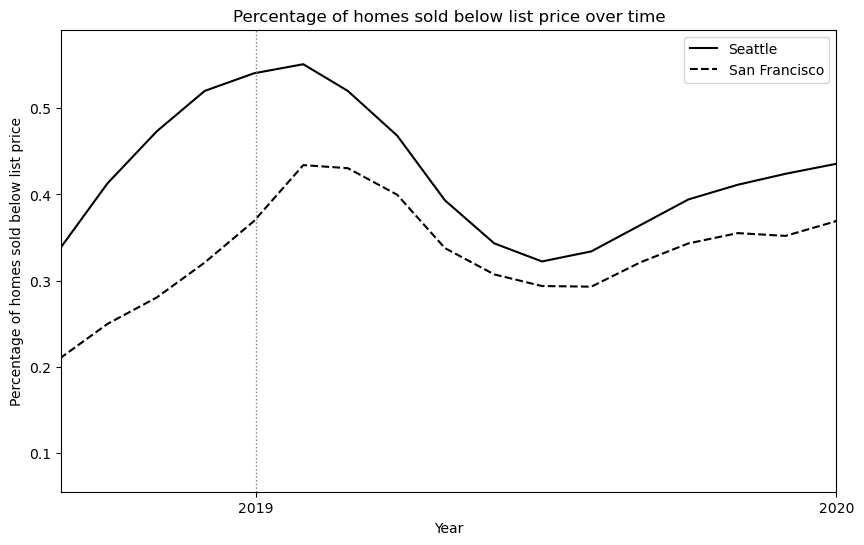

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df = pd.read_csv('cleanedZillowData_SeattleDummy.csv')

# Filter data
seattle_df = df[(df['seattle'] == 1)]
sanFrandf = df[(df['region_name'] == 'San Francisco, CA')]

# Convert 'date' to datetime
seattle_df['date'] = pd.to_datetime(seattle_df['date'])
sanFrandf['date'] = pd.to_datetime(sanFrandf['date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(seattle_df['date'], seattle_df['pct_sold_below_list'], label='Seattle', color = 'black', linestyle='solid')
plt.plot(sanFrandf['date'], sanFrandf['pct_sold_below_list'], label='San Francisco', color = 'black', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Percentage of homes sold below list price')
plt.title('Percentage of homes sold below list price over time')

# Set x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add a vertical line for a specific date
plt.axvline(pd.to_datetime('2019-01-01'), color='gray', linestyle='dotted', linewidth=1)

# Set x-axis limits
plt.xlim([pd.to_datetime('2018-09-01'), pd.to_datetime('2020-01-01')])

plt.legend()
plt.show()


#### Using a Neural Network (keras) to predict percentage of homes sold below list


In [ ]:
neuralNetworkDF = pd.read_csv("final.xlsx - dataset.csv")
neuralNetworkDF.drop(["region_name", "state_name","region_type"],axis=1,inplace=True)
neuralNetworkDF["date"] = pd.to_datetime(neuralNetworkDF["date"], format='%Y.%m.%d').dt.year
